## Mobile phone usability

In [33]:
import numpy as np
import pandas as pd 
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
file = pd.read_csv(r'c:\Users\massimiliano.canosi\Downloads\archive\mobile phone price prediction.csv')

In [4]:
file = file.drop(file.columns[0], axis=1)

In [5]:
file.describe()

,Rating,Spec_score
count,1370.000000,1370.000000
mean,4.374416,80.234307
std,0.230176,8.373922
min,3.750000,42.000000
25%,4.150000,75.000000
50%,4.400000,82.000000
75%,4.550000,86.000000
max,4.750000,98.000000


In [6]:
data_info = file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1370 non-null   object 
 1   Rating             1370 non-null   float64
 2   Spec_score         1370 non-null   int64  
 3   No_of_sim          1370 non-null   object 
 4   Ram                1370 non-null   object 
 5   Battery            1370 non-null   object 
 6   Display            1370 non-null   object 
 7   Camera             1370 non-null   object 
 8   External_Memory    1370 non-null   object 
 9   Android_version    927 non-null    object 
 10  Price              1370 non-null   object 
 11  company            1370 non-null   object 
 12  Inbuilt_memory     1351 non-null   object 
 13  fast_charging      1281 non-null   object 
 14  Screen_resolution  1368 non-null   object 
 15  Processor          1342 non-null   object 
 16  Processor_name     1370 

In [7]:
file['Ram'] = file['Ram'].astype(str).str.extract('(\d+)').astype(float)
# file['Ram'].unique()

In [8]:
file['Battery'] = file['Battery'].astype(str).str.extract('(\d+)').astype(float)
# file['Battery'].unique()

In [9]:
file['Price'] = (file['Price'].apply(lambda x: x.replace(",",""))).astype(float)

In [10]:
file['company'] = file['company'].str.upper()

In [11]:
file['Android_version'].fillna(file['Android_version'].mode()[0], inplace=True)
file['Inbuilt_memory'].fillna(file['Inbuilt_memory'].mode()[0],inplace=True)
file['Processor'].fillna(file['Processor'].mode()[0],inplace=True)
file['Screen_resolution'].fillna(file['Screen_resolution'].mode()[0],inplace=True)
file['fast_charging'].fillna(file['fast_charging'].mode()[0],inplace=True)

In [12]:
def extract_res(res_str):

    import re 

    match = re.search(r'(\d+)\s*x\s*(\d+)', str(res_str))

    if match:
        return int(match.group(1)) * int(match.group(2))
    else:
        return None

In [13]:
file['Screen_resolution'] = file['Screen_resolution'].apply(extract_res)
# file['Screen_resolution'].unique()

## Top Companies

In [14]:
top_companies = file.pivot_table(index='company', values='Rating', aggfunc='mean').sort_values(by='Rating', ascending=False).reset_index()[:5]
top_companies

,company,Rating
0,COOLPAD,4.600000
1,GIONEE,4.470000
2,ASUS,4.447619
3,LENOVO,4.442857
4,TECNO,4.426923


## Top Products

In [15]:
top_products_df = file[file['company'].isin(top_companies['company'])]

top_products = top_products_df.pivot_table(index=['company', 'Name'], values='Rating', aggfunc='mean') \
                .sort_values(by=['Rating', 'company', 'Name'], ascending=False).reset_index()[:5]

top_products

,company,Name,Rating
0,LENOVO,Lenovo Legion Duel 3 5G,4.75
1,LENOVO,Lenovo K13 Pro,4.75
2,ASUS,Asus ZenFone 9,4.75
3,ASUS,Asus ROG Phone 8 Ultimate,4.75
4,ASUS,Asus ROG Phone 6 Pro 5G,4.75


#### Top Product per company

In [16]:
top_product_for_cm = file[file['company'].isin(top_companies['company'])]

top_product_per_cm = top_product_for_cm.pivot_table(index='company', values='Rating', aggfunc='idxmax').reset_index()

top_product_fin = top_product_for_cm.loc[top_product_per_cm['Rating']][['company', 'Name']]
top_product_fin

,company,Name
663,ASUS,Asus ZenFone 9
1343,COOLPAD,Coolpad Cool 30 Pro
701,GIONEE,Gionee M12 Pro
694,LENOVO,Lenovo K13 Pro
1220,TECNO,Tecno Phantom X2 Pro


## Number of products for each company

In [29]:
products = file[['company', 'Name']]

prodcuts_pivot = products.pivot_table(index='company', values='Name', aggfunc='nunique').reset_index() \
                    .rename(columns={'Name': 'Product Count'})

px.treemap(prodcuts_pivot, names = 'company', path=['company'], values='Product Count', color='Product Count' \
           , hover_data={'Product Count': False}, title='#Products for Each Company')

## AVG Price per Company

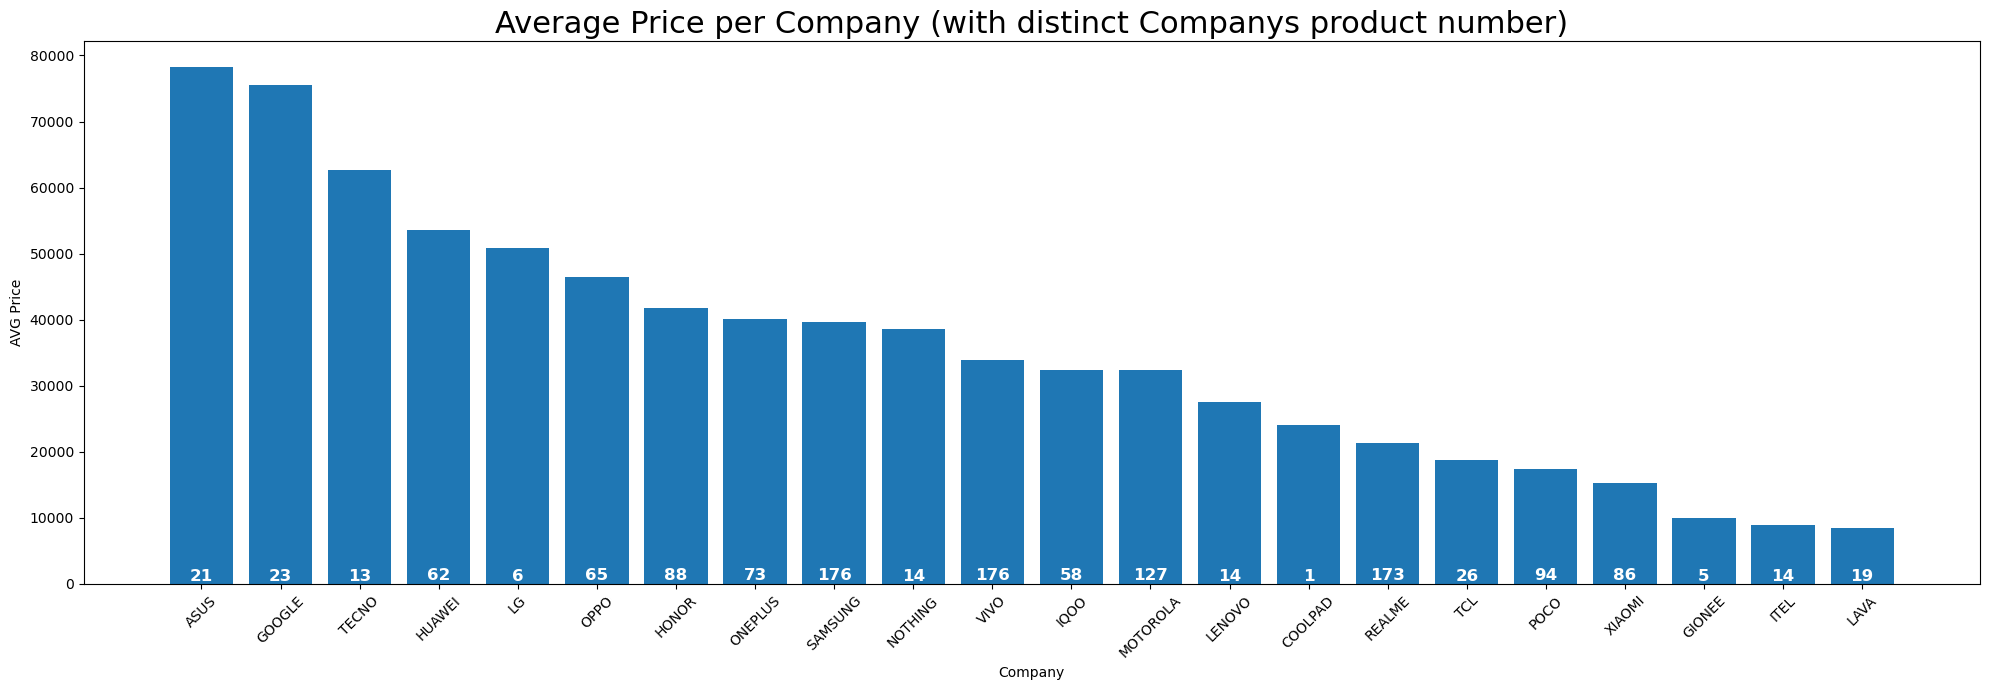

In [18]:
avg_price_cm = file.pivot_table(index='company', values=['Price', 'Name'], aggfunc={'Price': 'mean', 'Name':'nunique'}).sort_values(by='Price', ascending=False).reset_index()
avg_price_cm
fig, ax = plt.subplots(1,1, figsize=(20,7), tight_layout=True)
ax.set_title('Average Price per Company (with distinct Company''s product number)', fontsize = 22)
ax.set_xlabel("Company")
ax.set_ylabel("AVG Price")
ax.bar(avg_price_cm['company'], height= avg_price_cm['Price'])

for i, v in enumerate(avg_price_cm['Name']):
    ax.text(i, v, v , ha='center', va='bottom', fontsize=12, color='white', weight='bold')

plt.xticks(rotation=45) 
plt.show()

## Price Range per Company

In [19]:
boxplot_data = file[['Price', 'company']].sort_values(by='Price').copy()

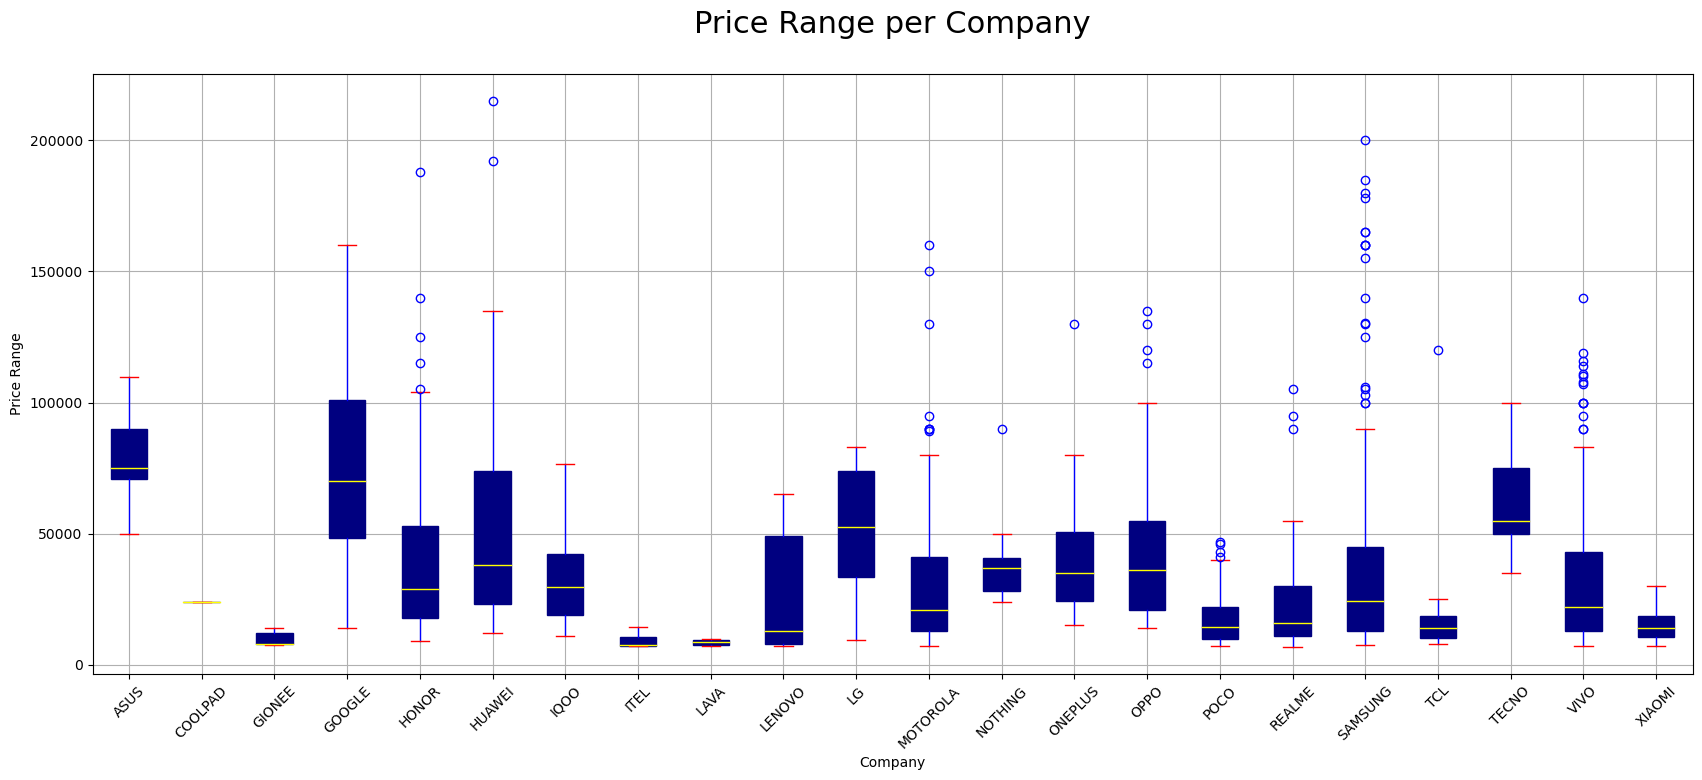

In [20]:
c = "red"
ax1 = boxplot_data.boxplot(column='Price', by='company', figsize=(20,8), patch_artist=True, boxprops=dict(facecolor='navy', color='navy'),
            capprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            flierprops=dict(color=c, markeredgecolor='blue'),
            medianprops=dict(color='yellow'))
ax1.set_ylabel('Price Range')
ax1.set_xlabel('Company')
ax1.set_title("")
plt.suptitle('Price Range per Company', fontsize = 22)
plt.xticks(rotation=45) 
plt.show()

### This graph can be used to understand the market price distribution in order to strategically price the products

## Correlation between Price, Specs and products

In [22]:
price_spec_df = file[['company', 'Name', 'Spec_score', 'Price']].copy()

In [23]:
price_spec_pivot = price_spec_df.pivot_table(index='company', values=['Name', 'Spec_score', 'Price'] \
                                                , aggfunc={'Name': 'nunique', 'Spec_score': 'mean', 'Price': 'mean'}).reset_index()

price_spec_pivot = price_spec_pivot.rename(columns = {'company': 'Company', 'Name': 'Distinct products', 'Spec_score': 'AVG Spec Score', 'Price': 'AVG Price'})

In [24]:
px.scatter(price_spec_pivot, x='AVG Spec Score', y='AVG Price', size='Distinct products', color='Company', title="AVG Spec Score and AVG Price vs Distinct Product, for Each Company ")

#### This plot represents the market. It can be used to find the best possible combination between specs and price to gain a competitive advantage. This graph can help in developing products that balance specs and pricing level to meet the demand.

------------------------------------

## Linear Regression

(0.0, 227120.51810758113)

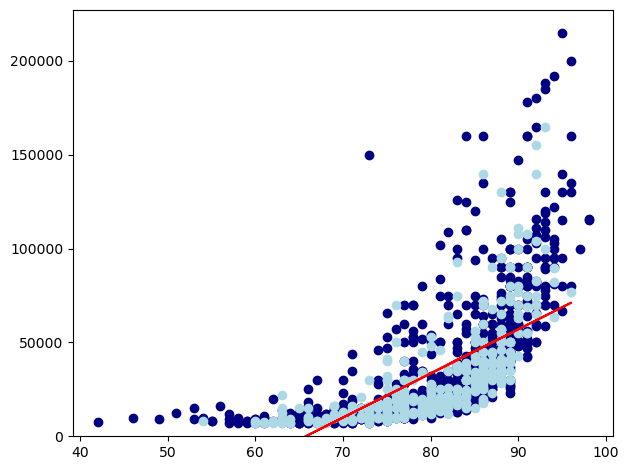

In [61]:
imp = SimpleImputer(strategy='median')

data = file[['Battery', 'Ram', 'Screen_resolution']]

data = imp.fit_transform(data)

features = ['Spec_score']
X = file[features]
y = file['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, train_size=0.75)

model = LinearRegression()
model.fit(X_train, y_train)

# b=model.intercept_
# w=model.coef_
# formula = w * X_train + b

y_pred_train1 = model.predict(X_train)
y_pred_test1 = model.predict(X_test)

plt.scatter(X_train, y_train,c='navy')
plt.scatter(X_test, y_test, c='lightblue')
plt.plot(X_test, y_pred_test1, c='red')
plt.tight_layout()
plt.ylim(0)

#### The scatter plot and regression red line illustrate the predictive power of the "Spec_score" feature on pricing.